<a href="https://colab.research.google.com/github/Sumaira-willis/Activity-2/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("Real estate.csv")

# Drop index column if present
df.drop(columns=["No"], inplace=True)

# Preview data
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

Missing values:
 house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64


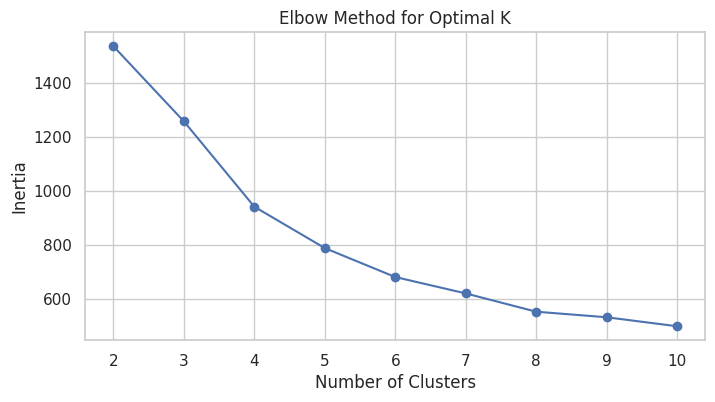

In [4]:
# Elbow method to find optimal clusters
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [5]:
# Choose optimal K (e.g., 4 based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Silhouette score
score_kmeans = silhouette_score(scaled_df, kmeans_labels)
print("K-Means Silhouette Score:", score_kmeans)

K-Means Silhouette Score: 0.3265348617301304


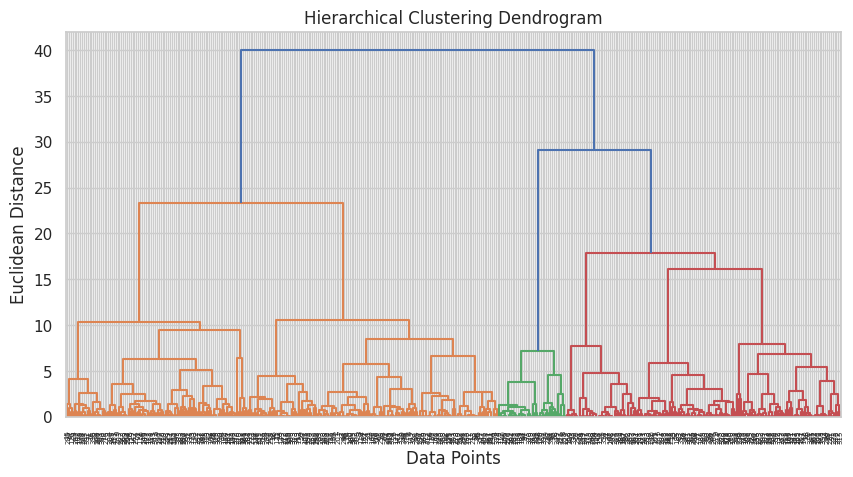

Hierarchical Clustering Silhouette Score: 0.3123258426770106


In [6]:
# Hierarchical Clustering + Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(scaled_df)

# Silhouette score
score_hc = silhouette_score(scaled_df, hc_labels)
print("Hierarchical Clustering Silhouette Score:", score_hc)

In [7]:
# Dimensionality Reduction (PCA + t-SNE)
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df)

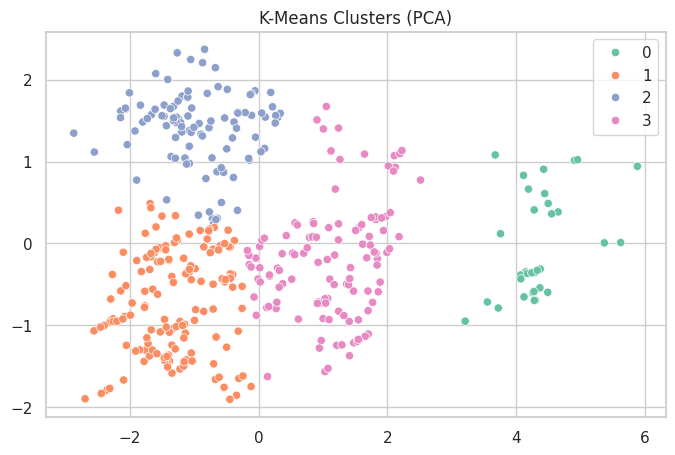

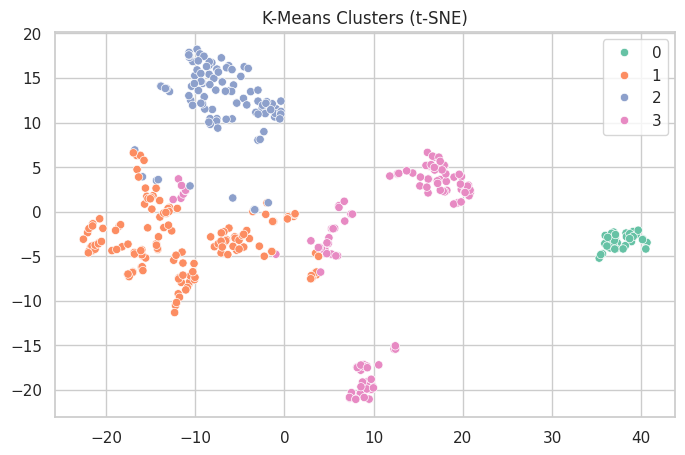

In [8]:
# Visualize Clusters (PCA and t-SNE)
# PCA plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="Set2")
plt.title("K-Means Clusters (PCA)")
plt.show()

# t-SNE plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans_labels, palette="Set2")
plt.title("K-Means Clusters (t-SNE)")
plt.show()